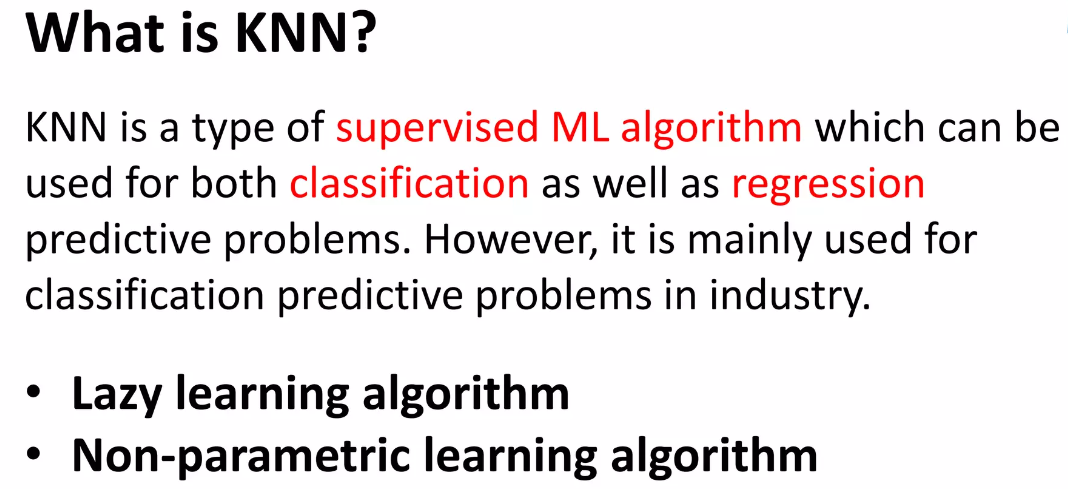
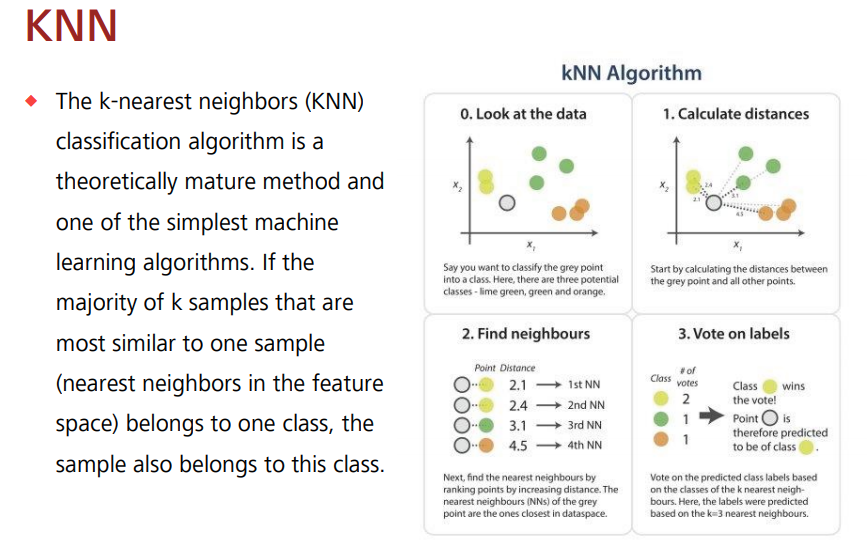
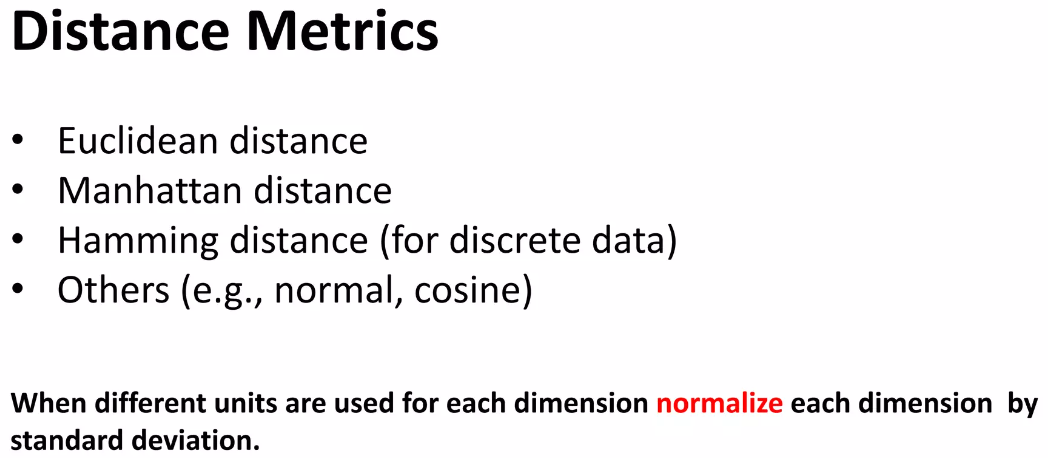
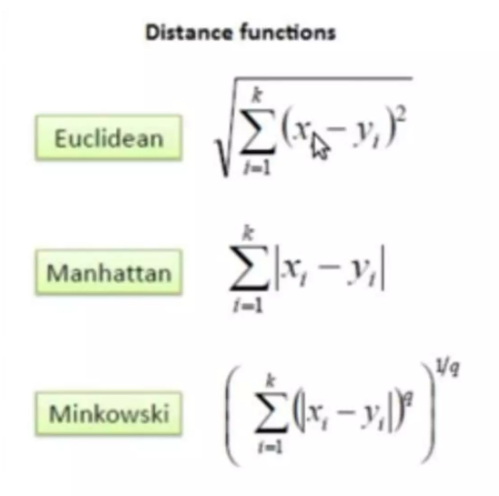
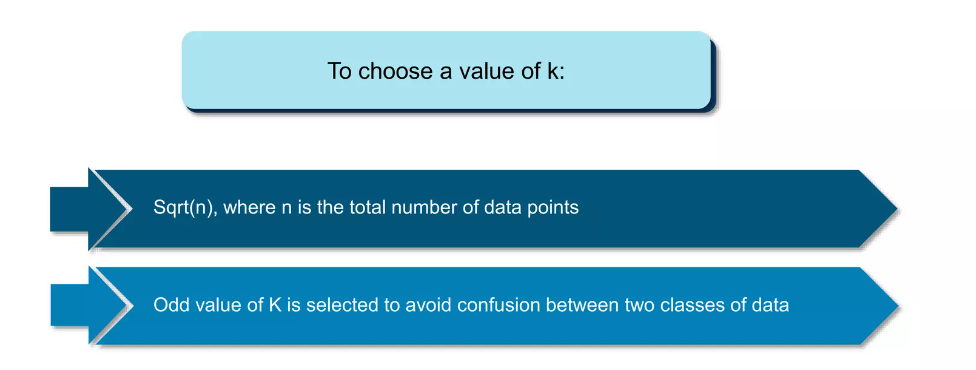
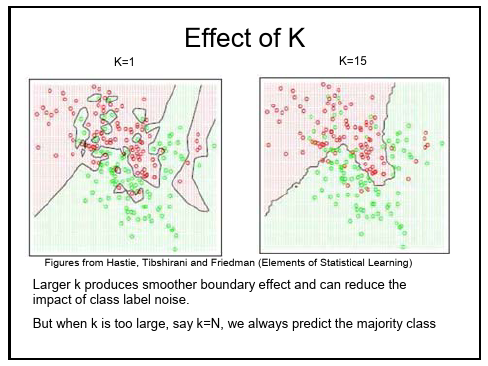
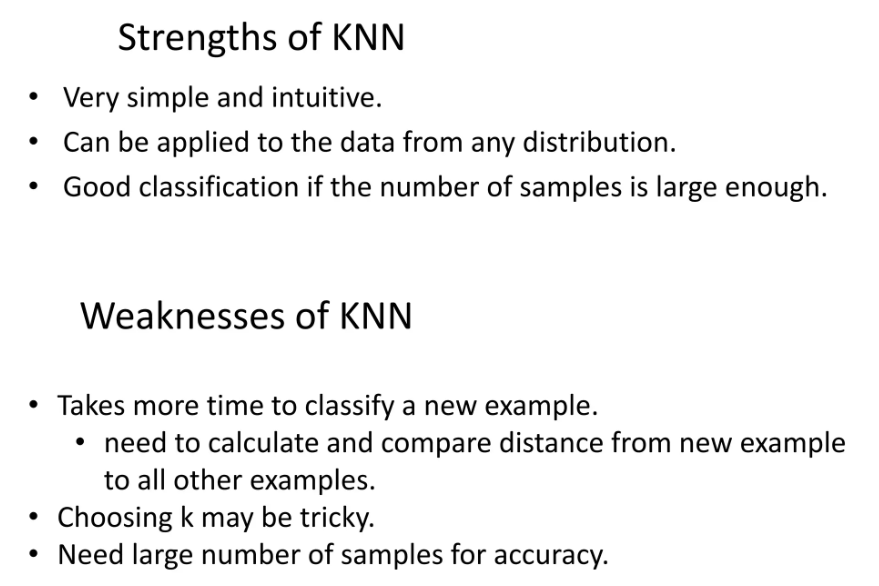

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact

pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

df.head()

: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.duplicated().sum()

68

In [5]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='count'>

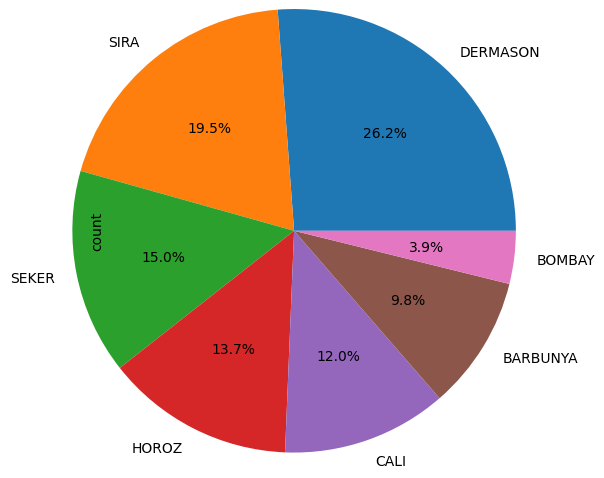

In [6]:
df.Class.value_counts().plot(kind="pie", autopct='%1.1f%%', radius=1.5)
# df.Class.value_counts().plot(kind="bar")

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,"13,543.00","53,048.46","29,392.44","20,420.00","36,282.50","44,580.00","61,382.00","254,616.00"
Perimeter,"13,543.00",854.99,214.72,524.74,703.23,793.90,977.15,"1,985.37"
MajorAxisLength,"13,543.00",319.90,85.81,183.60,253.09,296.40,376.31,738.86
MinorAxisLength,"13,543.00",202.37,45.05,122.51,175.89,192.49,217.25,460.20
AspectRation,"13,543.00",1.58,0.25,1.02,1.43,1.55,1.70,2.43
Eccentricity,"13,543.00",0.75,0.09,0.22,0.72,0.76,0.81,0.91
ConvexArea,"13,543.00","53,767.99","29,844.25","20,684.00","36,673.00","45,122.00","62,360.00","263,261.00"
EquivDiameter,"13,543.00",253.03,59.31,161.24,214.93,238.25,279.56,569.37
Extent,"13,543.00",0.75,0.05,0.56,0.72,0.76,0.79,0.87
Solidity,"13,543.00",0.99,0.00,0.92,0.99,0.99,0.99,0.99


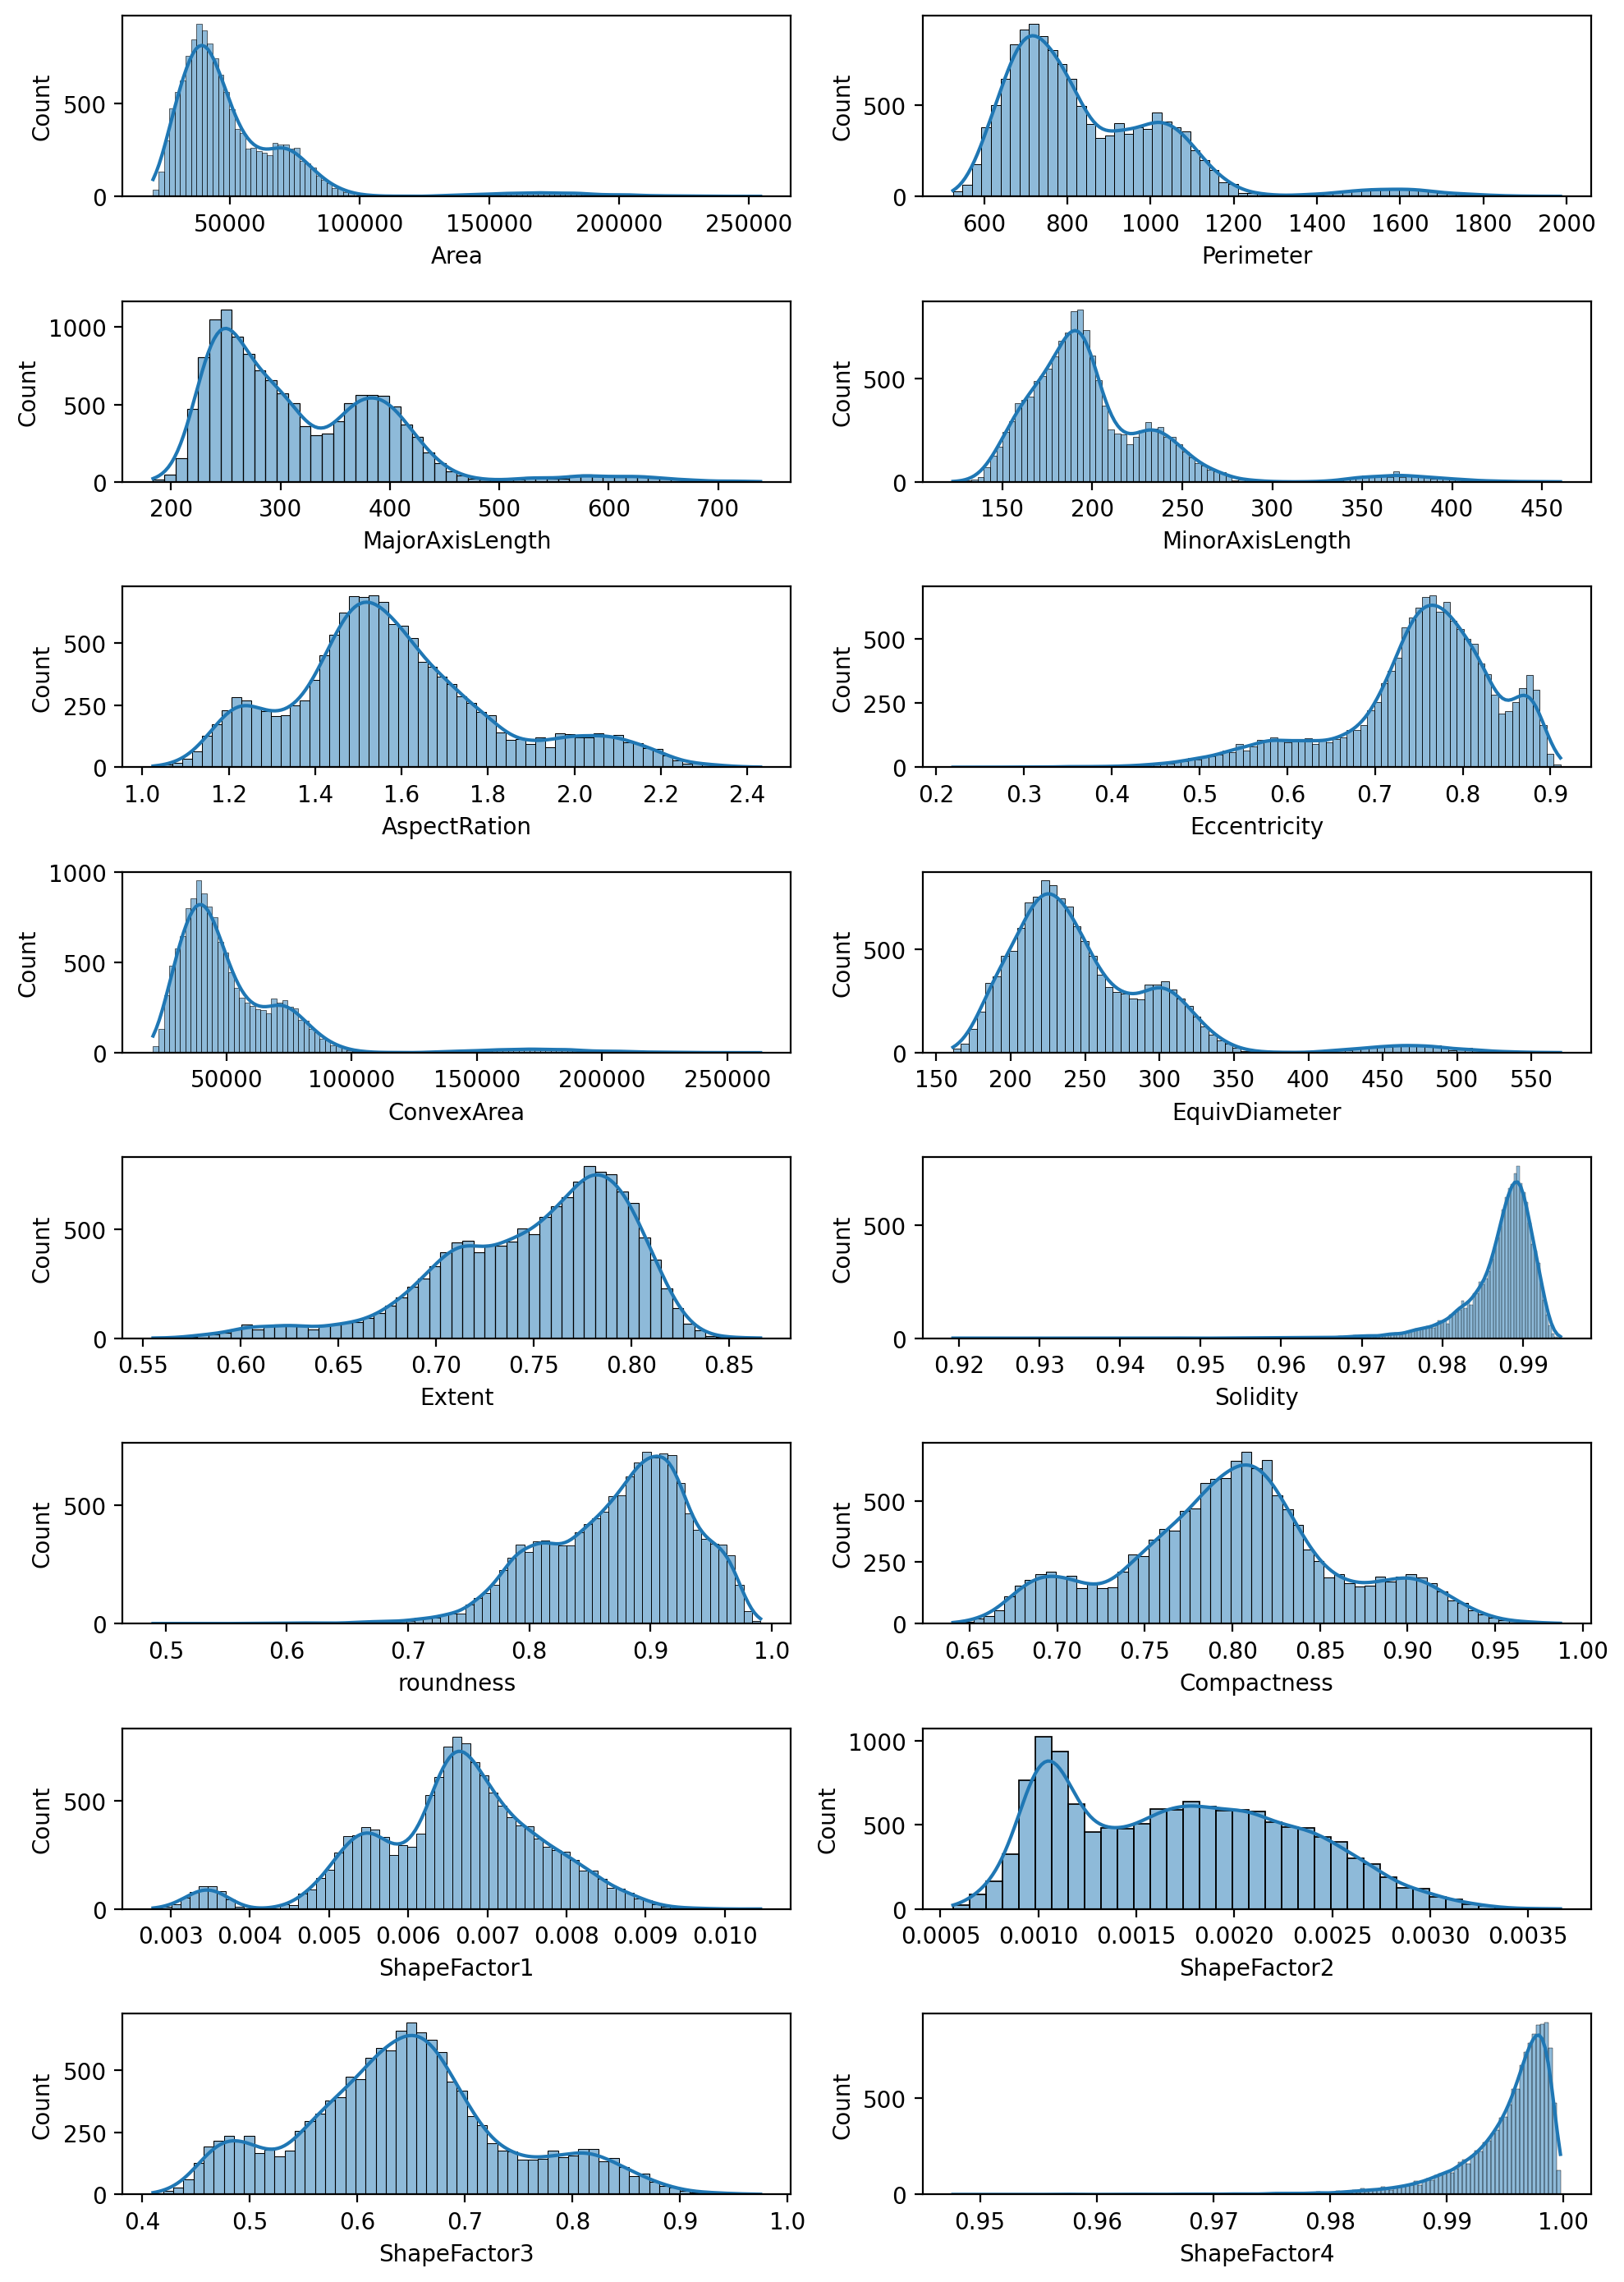

In [8]:
# Distribution of the numericalfeatures

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(10,14), dpi=200)
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])

plt.tight_layout()


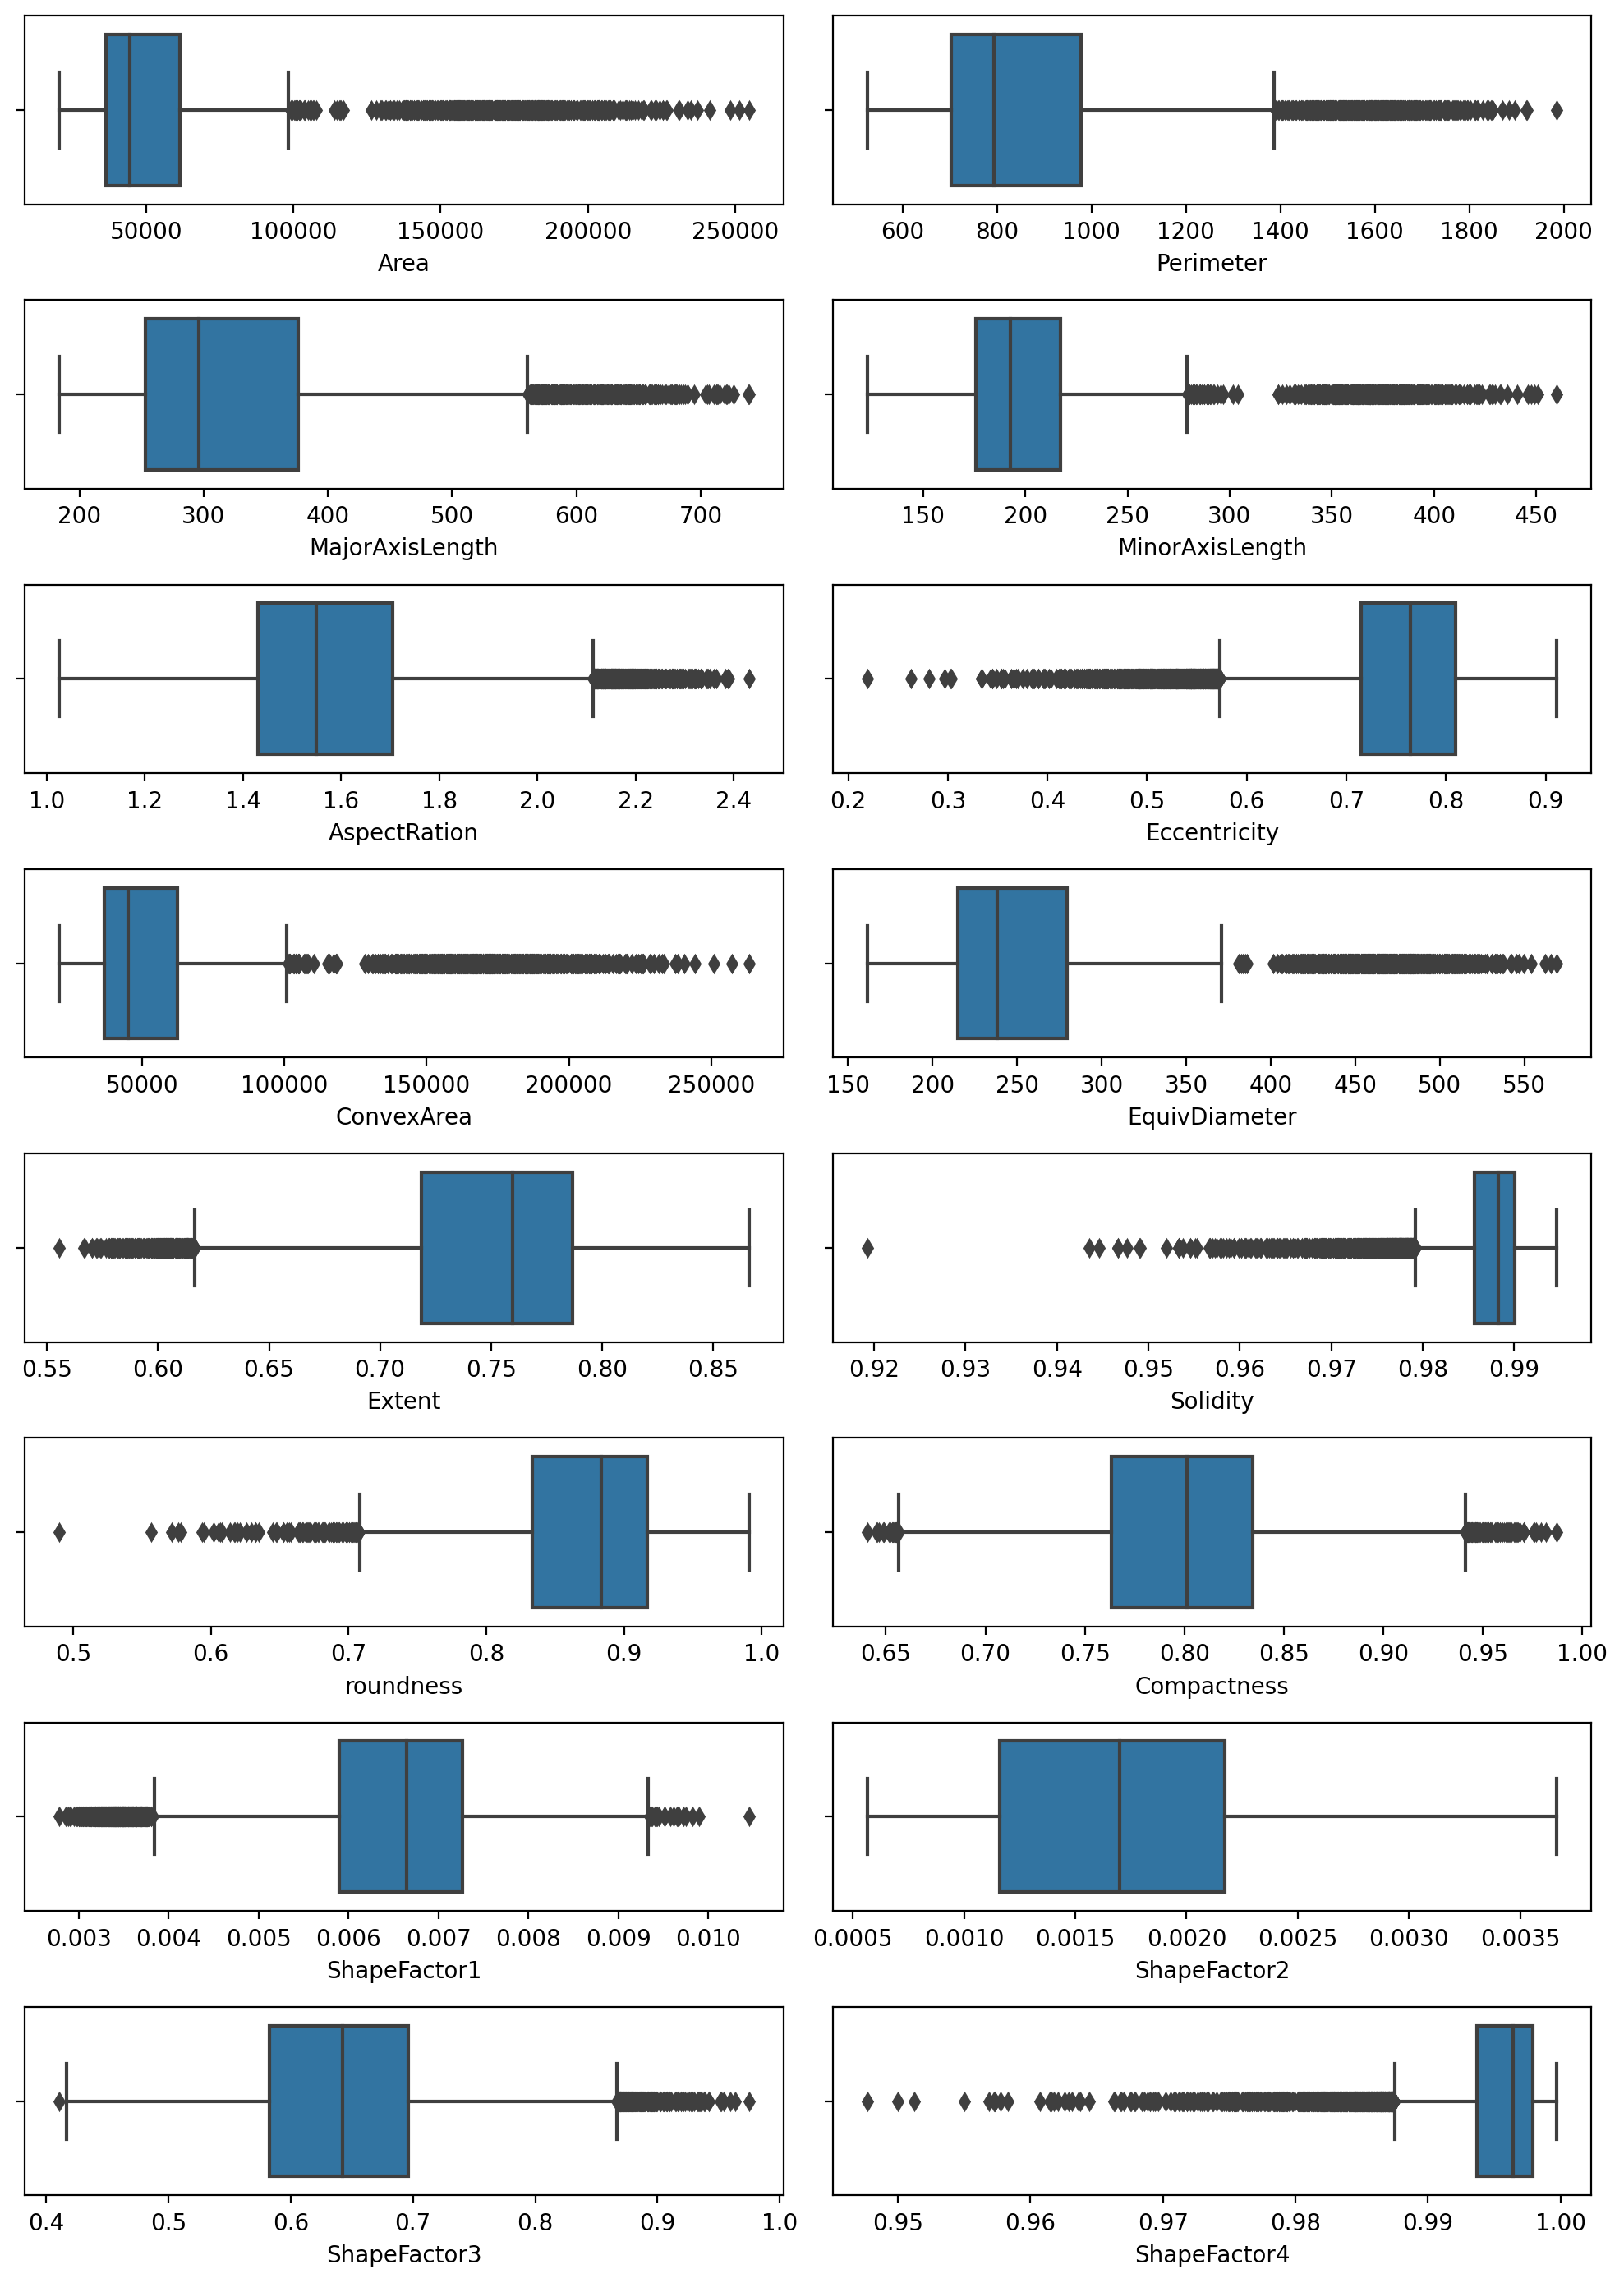

In [9]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(10,14), dpi=200)
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x=col, ax=axs[i])

plt.tight_layout()

In [10]:
def column_box(col):
    sns.boxplot(data = df,
                x= df[col], 
                y=df["Class"], 
                palette='bright')
cols = df.columns[:-1]
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisL…

In [11]:
def column_pair(col1,col2):
    sns.pairplot(df, 
                 vars=[col1,col2], 
                 hue="Class", 
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = df.columns
cols2 = df.columns
interact(column_pair, col1=cols1, col2=cols2);

interactive(children=(Dropdown(description='col1', options=('Area', 'Perimeter', 'MajorAxisLength', 'MinorAxis…

<Axes: >

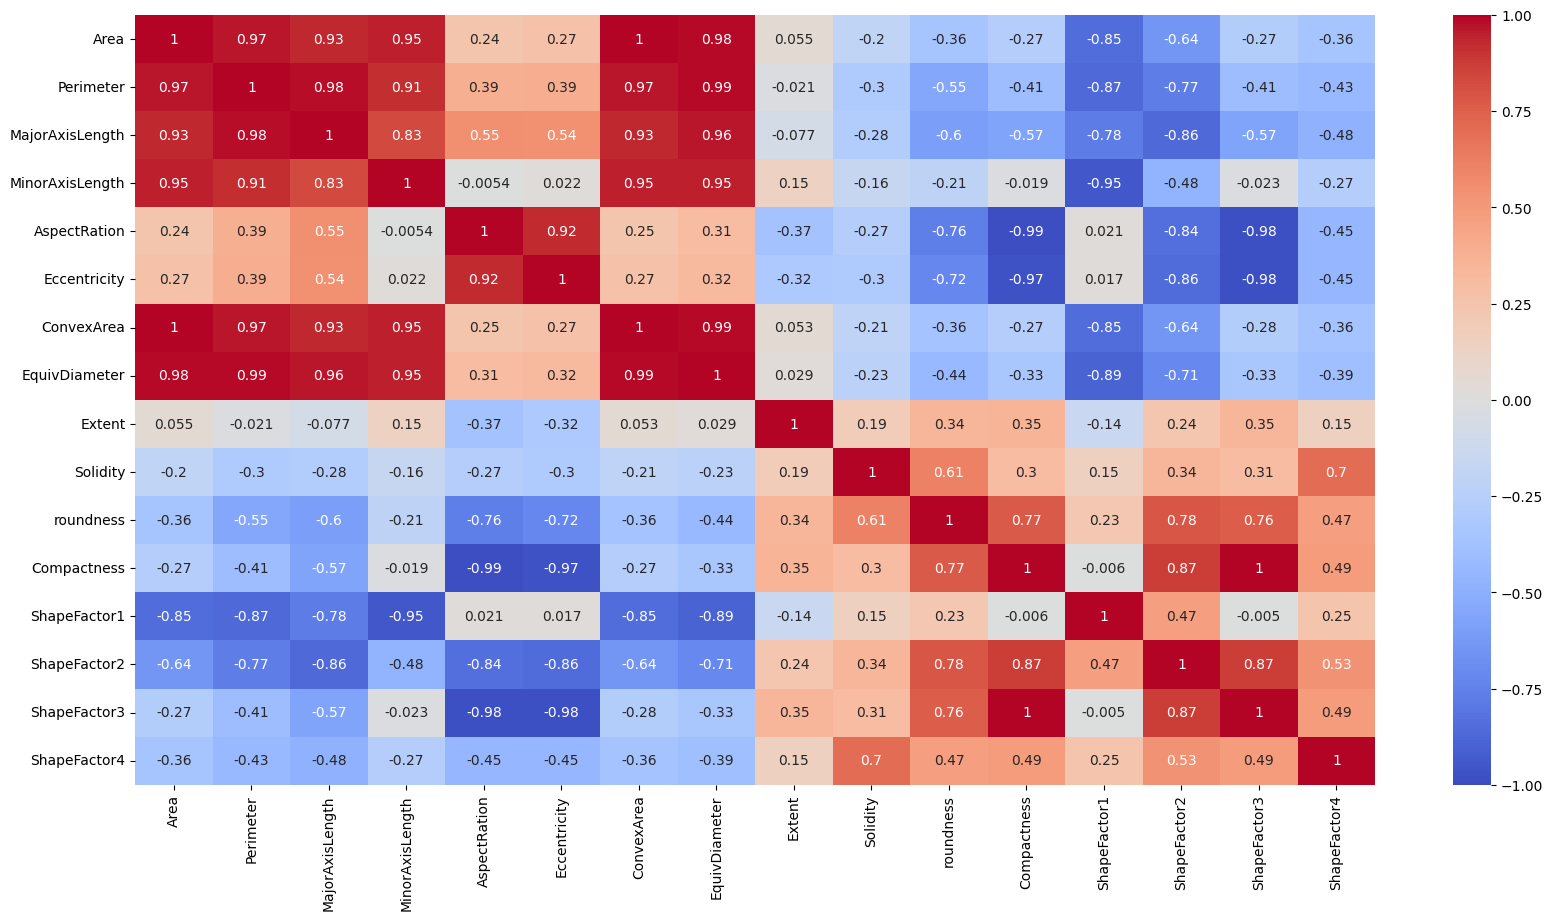

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), vmin=-1,vmax=1,annot=True,cmap="coolwarm")

In [13]:
import scipy.stats as stats

# Calculate the Spearman's rank correlation
spearman = stats.spearmanr(df["Area"], df["Class"])

# Calculate the Kendall's tau correlation
kendall = stats.kendalltau(df["Area"], df["Class"])


In [14]:
spearman, kendall

(SignificanceResult(statistic=-0.34333656800486057, pvalue=0.0),
 SignificanceResult(statistic=-0.19998066742831588, pvalue=8.8204263919889e-229))

# KNN

# Preprocessing 

In [15]:
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [16]:
X = df.drop("Class", axis=1)
y = df.Class

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()

# Modelling

## vanilla

In [19]:
ops = [("scaler", scaler), ("knn", KNeighborsClassifier())]

knn_mod = Pipeline(ops)

In [20]:
knn_mod.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [21]:
#predict
predictedVals = knn_mod.predict(X_test)
predictedProbs = knn_mod.predict_proba(X_test)

predictedVals_train = knn_mod.predict(X_train)
predictedProbs_train = knn_mod.predict_proba(X_train)

In [22]:
print("TEST CM\n" , confusion_matrix(y_test, predictedVals))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, predictedVals_train))

print("TEST REPORT \n", classification_report(y_test, predictedVals, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, predictedVals_train, digits= 3))

TEST CM
 [[232   0  21   0   1   3   8]
 [  0 104   0   0   0   0   0]
 [  8   0 309   0   5   2   2]
 [  0   0   0 647   0  10  52]
 [  0   0  13   4 347   0   8]
 [  6   0   1   7   0 380  12]
 [  3   0   0  49   8   6 461]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[ 988    0   46    0    2    6   15]
 [   0  418    0    0    0    0    0]
 [  19    0 1260    0   16    0    9]
 [   0    0    0 2687    5   34  111]
 [   3    0   17   11 1428    0   29]
 [   4    0    0   33    1 1551   32]
 [   6    0    7  170   23   25 1878]]
TEST REPORT 
               precision    recall  f1-score   support

    BARBUNYA      0.932     0.875     0.903       265
      BOMBAY      1.000     1.000     1.000       104
        CALI      0.898     0.948     0.922       326
    DERMASON      0.915     0.913     0.914       709
       HOROZ      0.961     0.933     0.947       372
       SEKER      0.948     0.936     0.942       406
        SIRA      0.849     0.875     0.8

In [23]:
knn_mod = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
scores = cross_validate(knn_mod,
                        X_train,
                        y_train,
                        cv=5, 
                        scoring=["accuracy", "f1_macro"], 
                        return_train_score=True)

In [24]:
score_df = pd.DataFrame(scores)
score_df.iloc[:,2:].mean()

test_accuracy    0.92
train_accuracy   0.94
test_f1_macro    0.93
train_f1_macro   0.95
dtype: float64

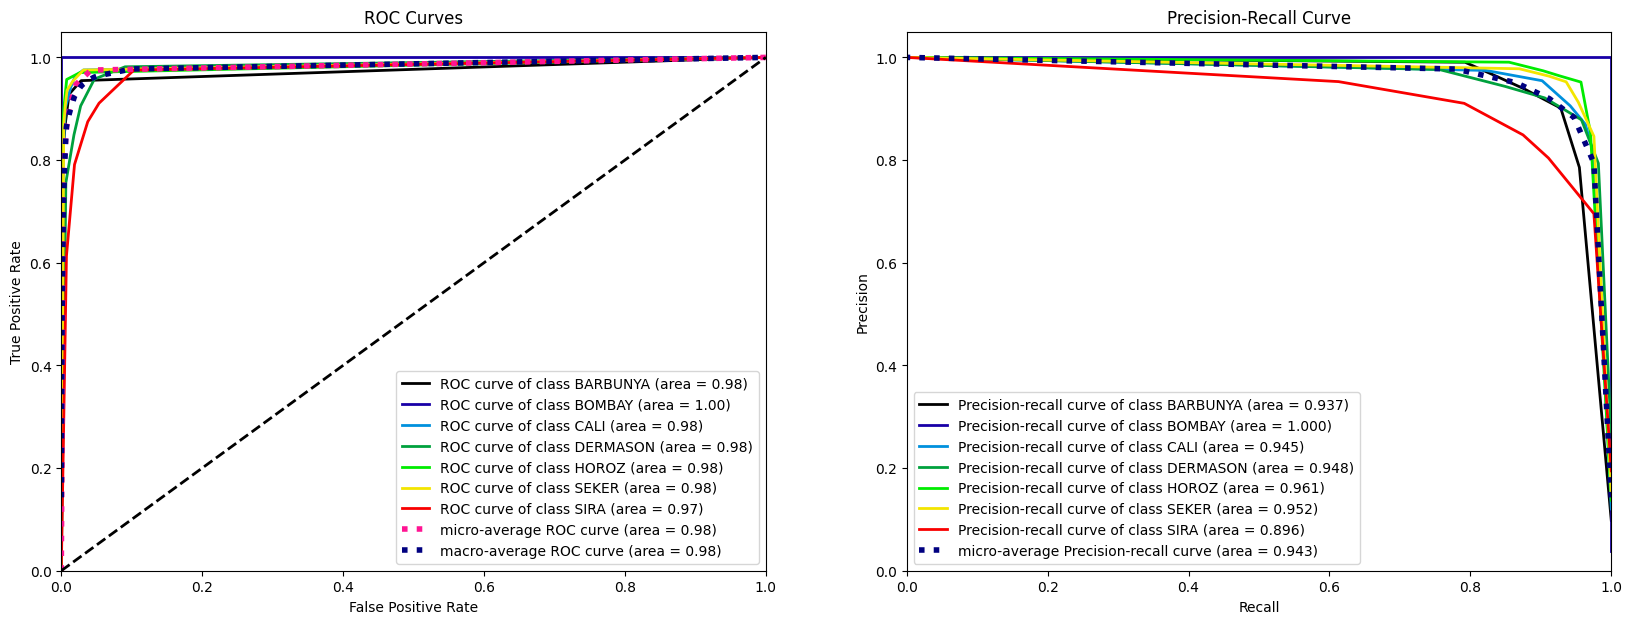

In [25]:
from scikitplot.metrics import plot_roc, plot_precision_recall
fig , ax = plt.subplots(1,2, figsize=(20,7))
plot_roc(y_test, predictedProbs , ax=ax[0]);
plot_precision_recall(y_test, predictedProbs, ax=ax[1]);

## Elbow Method

In [26]:
test_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model,
                            X_train,
                            y_train,
                            scoring=['f1_macro'],
                            cv=5,
                            n_jobs=-1)
     
    f1_mean = scores["test_f1_macro"].mean() 
    
    test_error = 1 - f1_mean
    
    test_error_rates.append(test_error)

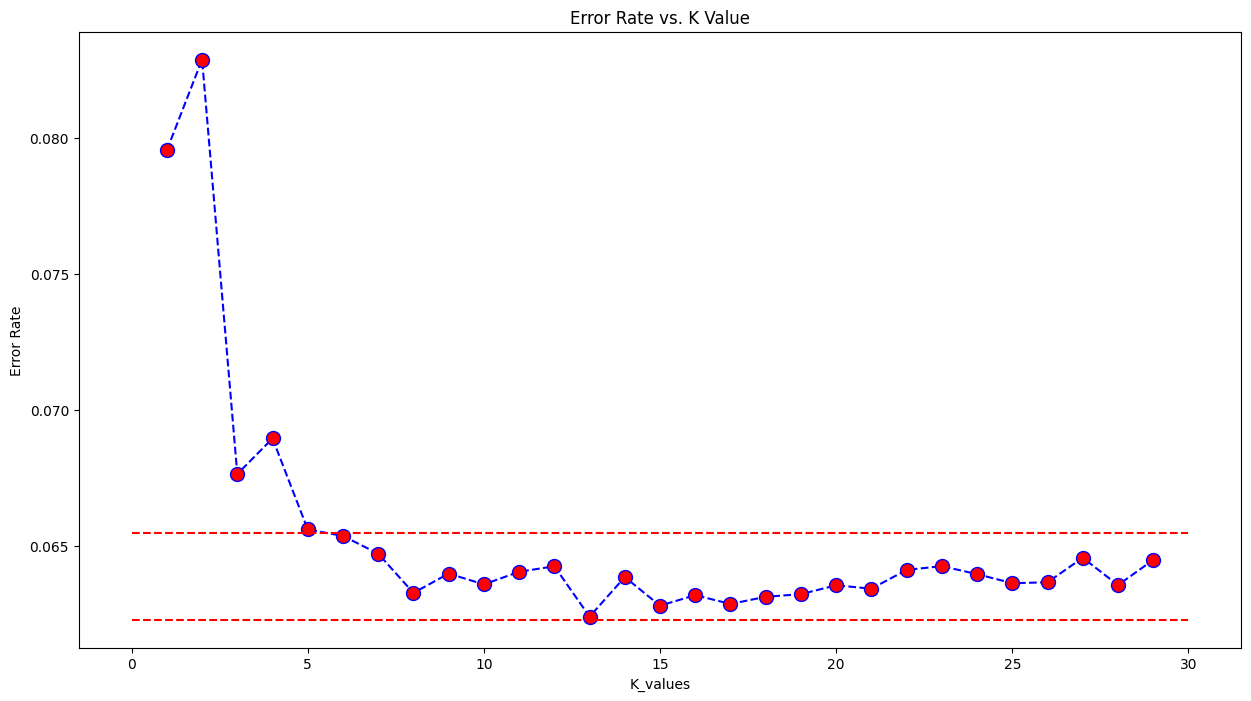

In [27]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0655, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0623, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [28]:
ops = [("scaler", scaler), ("knn", KNeighborsClassifier(n_neighbors=13))]

knn_mod = Pipeline(ops)

In [29]:
knn_mod.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])

In [30]:
#predict
predictedVals = knn_mod.predict(X_test)
predictedProbs = knn_mod.predict_proba(X_test)

predictedVals_train = knn_mod.predict(X_train)
predictedProbs_train = knn_mod.predict_proba(X_train)

In [31]:
print("TEST CM\n" , confusion_matrix(y_test, predictedVals))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, predictedVals_train))

print("TEST REPORT \n", classification_report(y_test, predictedVals, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, predictedVals_train, digits= 3))

TEST CM
 [[233   0  20   0   1   4   7]
 [  0 104   0   0   0   0   0]
 [  3   0 312   0   6   2   3]
 [  0   0   0 644   0  13  52]
 [  0   0  14   5 345   0   8]
 [  5   0   0   7   0 383  11]
 [  4   0   1  50   6   5 461]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[ 968    0   60    0    3    5   21]
 [   0  418    0    0    0    0    0]
 [  23    0 1255    0   16    0   10]
 [   0    0    0 2656    4   47  130]
 [   2    0   23    7 1423    0   33]
 [   6    0    0   30    1 1542   42]
 [   5    0    3  192   25   19 1865]]
TEST REPORT 
               precision    recall  f1-score   support

    BARBUNYA      0.951     0.879     0.914       265
      BOMBAY      1.000     1.000     1.000       104
        CALI      0.899     0.957     0.927       326
    DERMASON      0.912     0.908     0.910       709
       HOROZ      0.964     0.927     0.945       372
       SEKER      0.941     0.943     0.942       406
        SIRA      0.851     0.875     0.8

In [32]:
knn_mod = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
scores = cross_validate(knn_mod,
                        X_train,
                        y_train,
                        cv=5, 
                        scoring=["accuracy", "f1_macro"], 
                        return_train_score=True)

In [33]:
score_df = pd.DataFrame(scores)
score_df.iloc[:,2:].mean()

test_accuracy    0.92
train_accuracy   0.94
test_f1_macro    0.93
train_f1_macro   0.95
dtype: float64

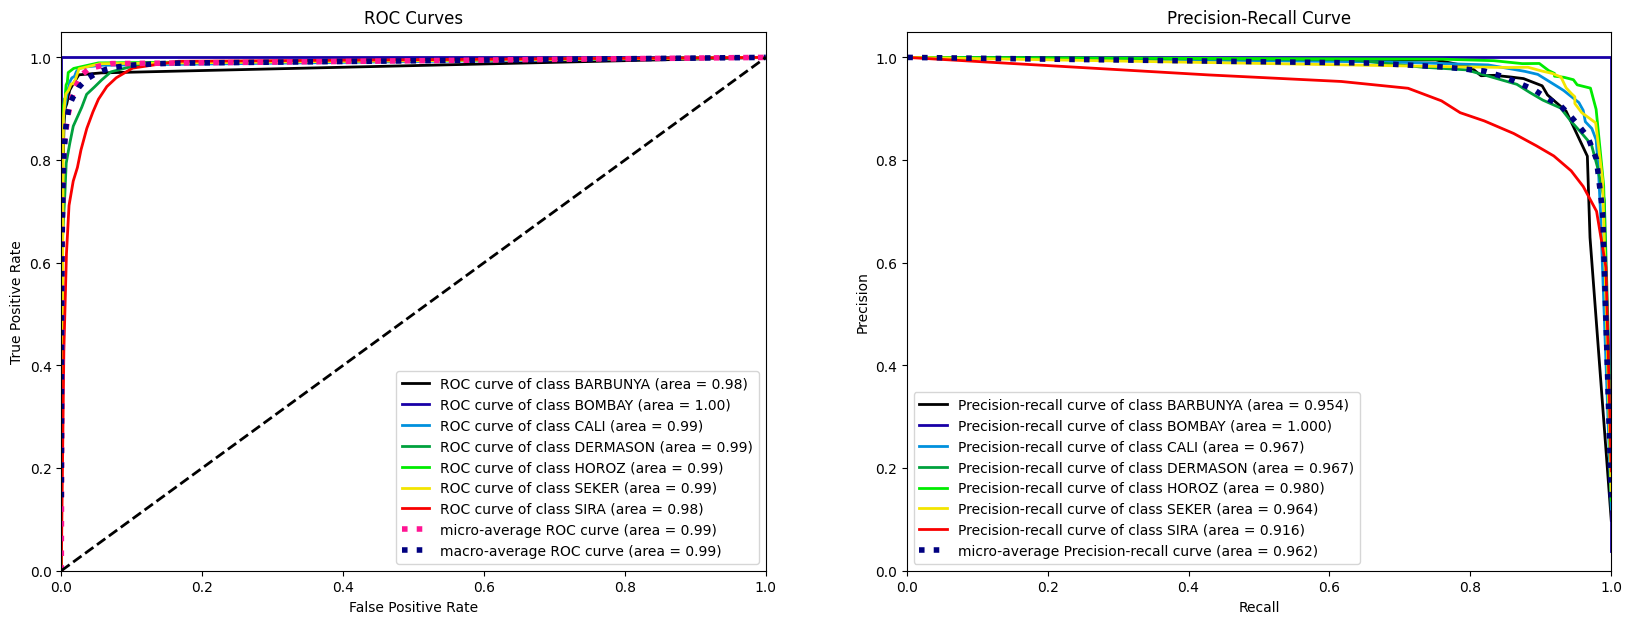

In [34]:
fig , ax = plt.subplots(1,2, figsize=(20,7))
plot_roc(y_test, predictedProbs , ax=ax[0]);
plot_precision_recall(y_test, predictedProbs, ax=ax[1]);

## GridsearchCV

In [35]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

param_grid = {"knn__n_neighbors": range(5, 15),
              "knn__p": np.linspace(1, 2, 3),
              "knn__weights": ['uniform',]}  # 'distance'

knn_grid_model = RandomizedSearchCV(knn_model,
                                    param_grid,
                                    cv=5, 
                                    scoring='f1_macro', 
                                    n_jobs=-1, 
                                    return_train_score=True)
# knn_grid_model = GridSearchCV(knn_model,
#                               param_grid,
#                               scoring='f1_macro',
#                               cv=5,
#                               n_jobs=-1, return_train_score=True)

knn_grid_model.fit(X_train, y_train)

knn_grid_model.best_params_

{'knn__weights': 'uniform', 'knn__p': 1.5, 'knn__n_neighbors': 13}

{'knn__weights': 'uniform', 'knn__p': 2, 'knn__n_neighbors': 18}

In [36]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.94
mean_train_score   0.94
Name: 6, dtype: object

In [37]:
#predict
predictedVals = knn_grid_model.predict(X_test)
predictedProbs = knn_grid_model.predict_proba(X_test)

predictedVals_train = knn_grid_model.predict(X_train)
predictedProbs_train = knn_grid_model.predict_proba(X_train)

In [38]:
print("TEST CM\n" , confusion_matrix(y_test, predictedVals))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, predictedVals_train))

print("TEST REPORT \n", classification_report(y_test, predictedVals, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, predictedVals_train, digits= 3))

TEST CM
 [[229   0  23   0   1   4   8]
 [  0 104   0   0   0   0   0]
 [  7   0 309   0   6   2   2]
 [  0   0   0 646   0  14  49]
 [  0   0  13   4 346   0   9]
 [  3   0   1   6   0 384  12]
 [  3   0   0  52   6   6 460]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[ 955    0   75    0    2    4   21]
 [   0  418    0    0    0    0    0]
 [  21    0 1258    0   15    0   10]
 [   0    0    0 2653    4   50  130]
 [   1    0   21    7 1420    0   39]
 [   4    0    0   31    1 1543   42]
 [   4    0    4  192   29   21 1859]]
TEST REPORT 
               precision    recall  f1-score   support

    BARBUNYA      0.946     0.864     0.903       265
      BOMBAY      1.000     1.000     1.000       104
        CALI      0.893     0.948     0.920       326
    DERMASON      0.912     0.911     0.912       709
       HOROZ      0.964     0.930     0.947       372
       SEKER      0.937     0.946     0.941       406
        SIRA      0.852     0.873     0.8

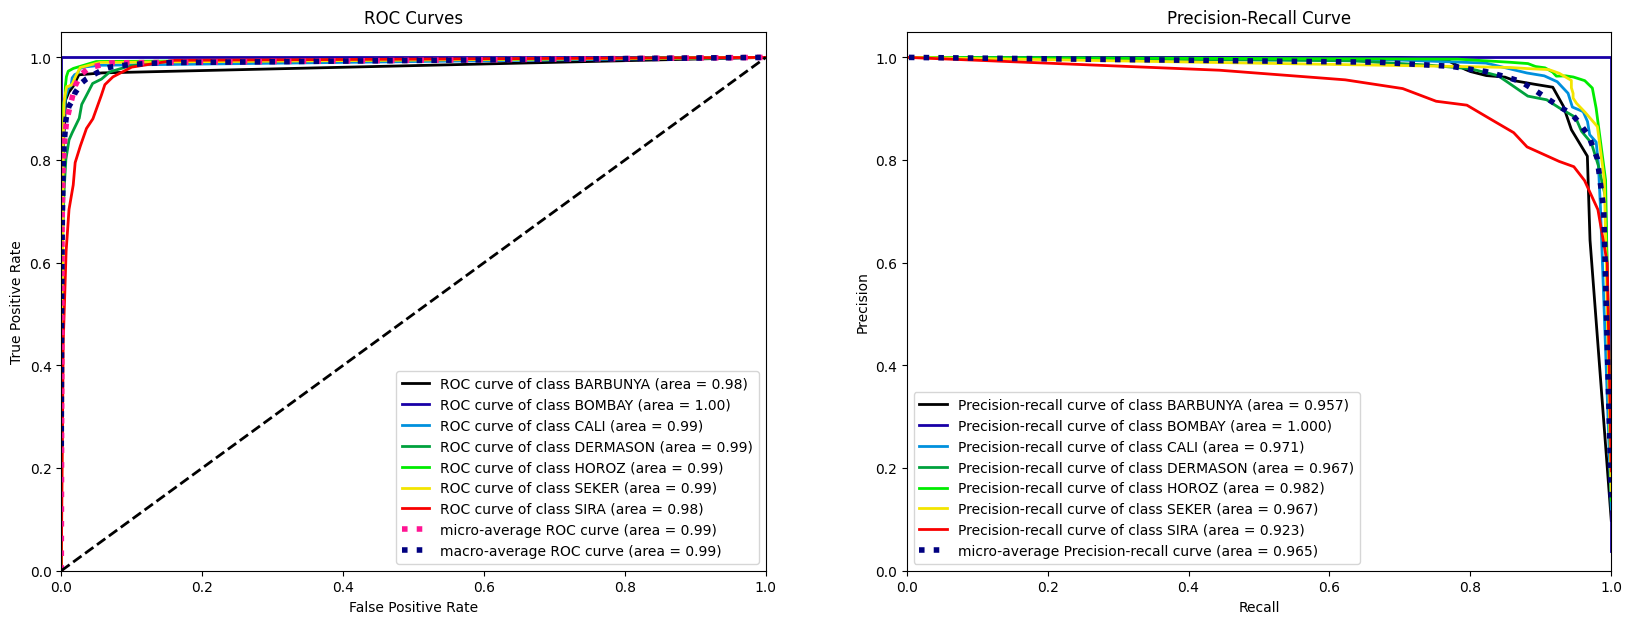

In [39]:
fig , ax = plt.subplots(1,2, figsize=(20,7))
plot_roc(y_test, predictedProbs , ax=ax[0]);
plot_precision_recall(y_test, predictedProbs, ax=ax[1]);

- sonraki aşama o da size ödev?